In [1]:
import pandas as pd
import world_bank_data as wb

from matplotlib import pyplot as plt
import math

pd.set_option('display.max_rows', 100)

# Topics

Topics are economics variables grouped

In [2]:
wb.get_topics().head()

,value,sourceNote
id,,
1,Agriculture & Rural Development,For the 70 percent of the world's poor who liv...
2,Aid Effectiveness,Aid effectiveness is the impact that aid has i...
3,Economy & Growth,Economic growth is central to economic develop...
4,Education,Education is one of the most powerful instrume...
5,Energy & Mining,The world economy needs ever-increasing amount...


In [3]:
# wb.get_topics().to_excel('topics.xlsx')

# Sources

Are official and unofficial data sources, throught countries around the world. This show the last updated data to take in account when someone choose a variable in topics, and it shows was got of that source.

In [4]:
wb.get_sources().head()

,lastupdated,name,code,description,url,dataavailability,metadataavailability,concepts
id,,,,,,,,
11,2013-02-22,Africa Development Indicators,ADI,,,Y,Y,3
36,2019-01-24,Statistical Capacity Indicators,BBS,,,Y,,3
31,2018-09-10,Country Policy and Institutional Assessment,CPI,,,Y,Y,3
41,2015-05-22,Country Partnership Strategy for India (FY2013...,CPS,,,Y,N,3
1,2018-10-31,Doing Business,DBS,,,Y,Y,3


In [5]:
wb.get_sources().to_excel('sources.xlsx')

# Countries

Countries supported by library, to get data

In [6]:
countries = wb.get_countries().reset_index(drop=False)[
                    wb.get_countries().reset_index(drop=False)['iso2Code']\
                    .isin(['RU','BR','IN','CN'])
                    ]

In [7]:
# wb.get_countries().to_excel('countries.xlsx')

# How to get Indicators

## Specific Indicators

In [8]:
indicator = []

indicator.append('SP.RUR.TOTL') # Rural Population
indicator.append('SP.POP.TOTL') # Total Population
indicator.append('SP.POP.GROW') # Population Growth

indicator.append('NE.IMP.GNFS.ZS') # Imports of goods and services - % of GDP -
indicator.append('NE.IMP.GNFS.KD.ZG') # Imports of goods and services - % annual growth -
indicator.append('NE.IMP.GNFS.KD') # Imports of goods and services - Constant prices 2010 USD -
indicator.append('NE.IMP.GNFS.CD') # Imports of goods and services - Current USD$ -
indicator.append('BM.GSR.TOTL.CD') # Imports of goods, services and primary income - BoP, Current USD$ -

indicator.append('NE.EXP.GNFS.ZS') # Exports of goods and services - % of GDP -
indicator.append('NE.EXP.GNFS.KD.ZG') # Exports of goods and services - % annual growth -
indicator.append('NE.EXP.GNFS.KD') # Exports of goods and services - Constant prices 2010 USD -
indicator.append('NE.EXP.GNFS.CD') # Exports of goods and services - Current USD$ -

indicator.append('BN.KLT.PTXL.CD') # Portfolio Investment, net - BoP, Current USD$ -
indicator.append('BX.KLT.DINV.WD.GD.ZS') # Foreign Direct Investment, net inflows - % GDP -
indicator.append('BX.KLT.DINV.CD.WD') # Foreign Direct Investment, net inflows - BoP, current USD$ -
indicator.append('BM.KLT.DINV.WD.GD.ZS') # Foreign Direct Investment, net outflows - % GDP -
indicator.append('BM.KLT.DINV.CD.WD') # Foreign Direct Investment, net outflows - BoP, Current USD$ -

indicator.append('BX.PEF.TOTL.CD.WD') # Portfolio equity, net inflows - BoP, current USD$ -

indicator.append('FI.RES.TOTL.CD') # Total Reserves, including gold - Current USD$ -
indicator.append('FI.RES.XGLD.CD') # Total Reserves, minux gold - Current USD$ - 
indicator.append('FP.CPI.TOTL.ZG') # Inflation - annual % -

indicator.append('NY.GNP.MKTP.CD') # GNI - Current USD$ -
indicator.append('DT.DOD.DECT.GN.ZS') # External debt Stocks - % GNI -
indicator.append('DT.DOD.DECT.CD') # External debt Stocks - DOD, Current USD$ -
indicator.append('DT.TDS.DECT.GN.ZS') # Total debt Service - % GNI -
indicator.append('BN.CAB.XOKA.CD') # Current Account Balance - BoP, Current USD$ -
indicator.append('DT.DOD.DSTC.IR.ZS') # Short Term Debt - % of Total Reseves - 
indicator.append('DT.DOD.PVLX.CD') # Present Value of External Debt - Current USD$ -

indicators_df = wb.get_indicators().reset_index(drop=False)[wb.get_indicators().reset_index(drop=False)['id'].isin(indicator)]
del indicator

## Prompt Selected indicators

In [9]:
indicators_df.shape

(28, 7)

In [10]:
# wb.get_indicators().to_excel('indicators.xlsx')

# Development

In [11]:
iter_indicators = indicators_df#\
#                     [indicators_df['id']\
#                         .isin(
#                             [
#                                 'NY.GNP.MKTP.CD',
#                                 'DT.TDS.DECT.GN.ZS',
#                                 'BM.KLT.DINV.WD.GD.ZS',
#                                 'BX.KLT.DINV.CD.WD',
#                                 'BM.KLT.DINV.CD.WD'
#                             ]
#                         )]
iter_indicators.shape

(28, 7)

## Plots

28 1 1 GNI (current US$)
28 1 2 Present value of external debt (current US$)
28 2 1 Portfolio Investment, net (BoP, current US$)
28 2 2 Current account balance (BoP, current US$)
28 3 1 Foreign direct investment, net outflows (% of GDP)
28 3 2 Foreign direct investment, net outflows (BoP, current US$)
28 4 1 Imports of goods, services and primary income (BoP, current US$)
28 4 2 Short-term debt (% of total reserves)
28 5 1 Total debt service (% of GNI)
28 5 2 Portfolio equity, net inflows (BoP, current US$)
28 6 1 Foreign direct investment, net inflows (% of GDP)
28 6 2 Foreign direct investment, net inflows (BoP, current US$)
28 7 1 Rural population
28 7 2 Population, total
28 8 1 Population growth (annual %)
28 8 2 Exports of goods and services (% of GDP)
28 9 1 Exports of goods and services (annual % growth)
28 9 2 Exports of goods and services (constant 2010 US$)
28 10 1 Exports of goods and services (current US$)
28 10 2 Imports of goods and services (% of GDP)
28 11 1 Imports of 

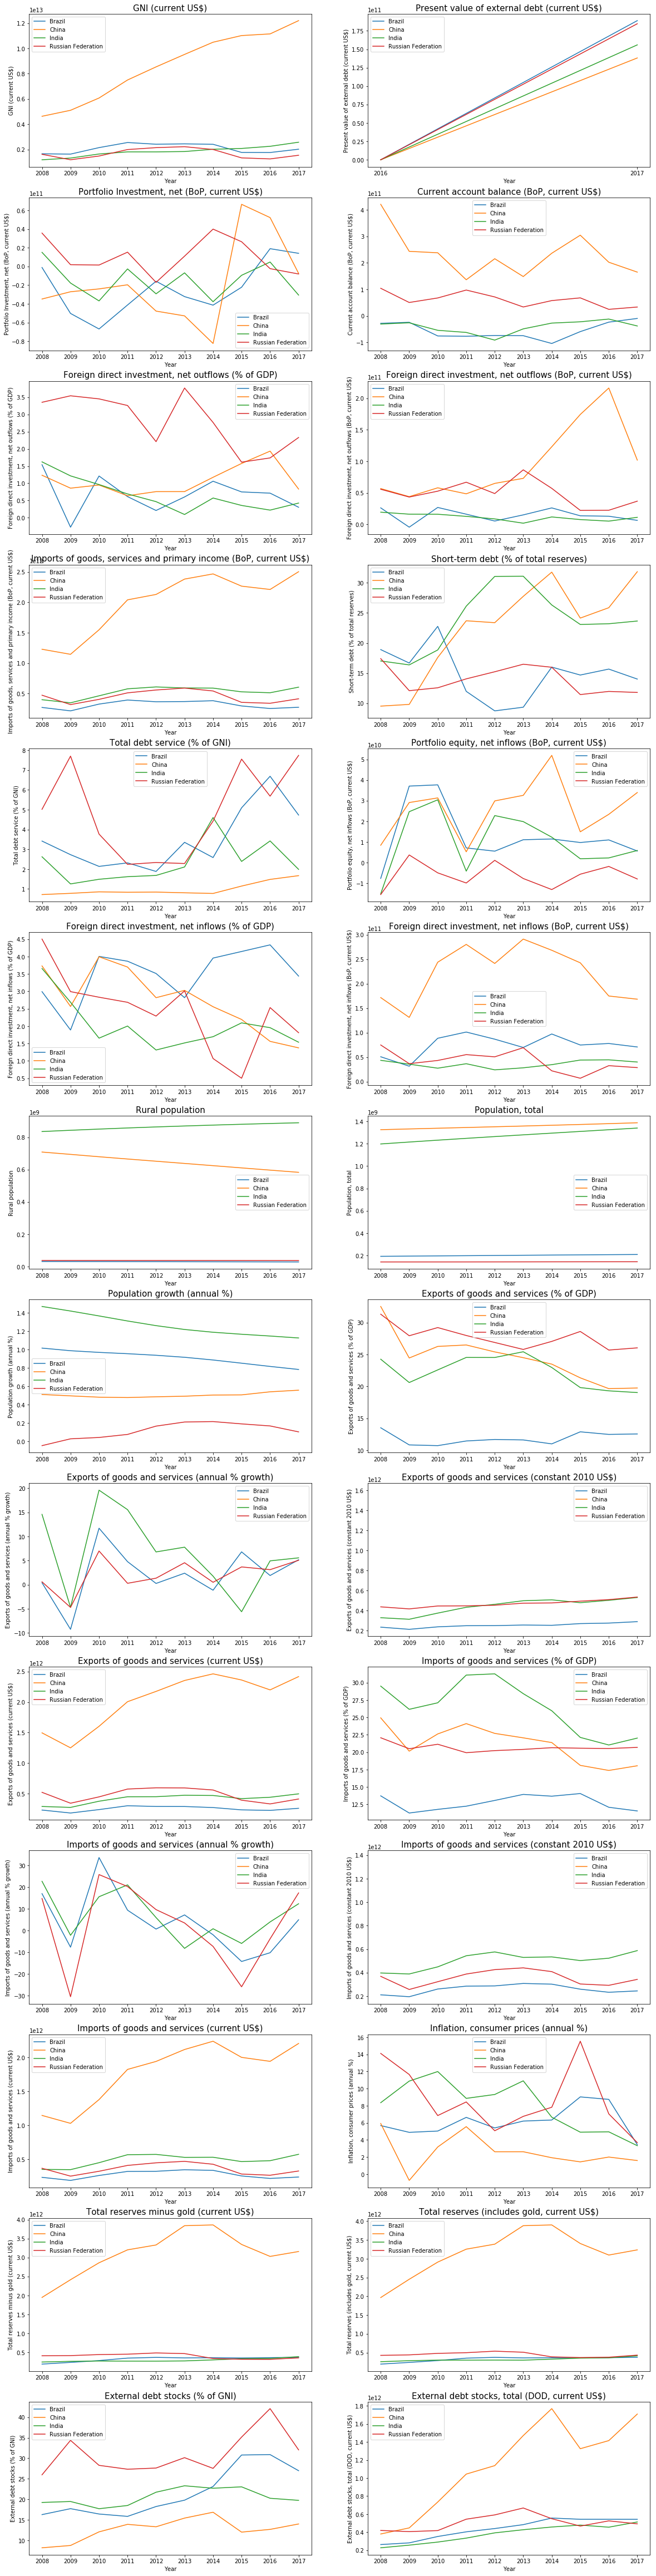

In [12]:
years_backward = 10

iter_plot = 0

plt.figure(figsize=(20,3*iter_indicators.shape[0]))

for i, values in iter_indicators.reset_index(drop=True).iterrows():
    
    analytic_data = pd.DataFrame(
                        wb.get_series(values['id'],
                        mrv=years_backward,
                        country=list(countries['iso2Code']))
                    ).reset_index(drop=False)
    analytic_data = analytic_data.merge(countries[['name','iso2Code','id']], left_on='Country', right_on='name', how='left')
    
    print(math.ceil(iter_indicators.shape[0]/2)*2, round(math.ceil((i+1)/2),0), abs(((i+1)%2)-2), iter_indicators[iter_indicators['id'] == values['id']]['name'].values[0])
    
    plt.subplot(math.ceil(iter_indicators.shape[0]/2), 2 , (i+1))
    
    plt.title(iter_indicators[iter_indicators['id'] == values['id']]['name'].values[0],fontsize=15)
    
    for j, country in countries.iterrows():
        
        plt.plot(
            analytic_data[
                analytic_data['id'] == country['id']
            ].reset_index(drop=False)['Year'],
            analytic_data[
                analytic_data['id'] == country['id']
            ].reset_index(drop=False)[values['id']], label=country['name']
        )
        
    plt.xlabel('Year')
    plt.ylabel(iter_indicators[iter_indicators['id'] == values['id']]['name'].values[0])
    plt.legend()
    
plt.show()